# Introducion

1. Беспилотные автомобили, рекомендательные системы, медицинские снимки, распознование лиц, обнаружение странного трафика

2. мультиклассовые и бинарные классификации.

3. В задаче мульткласса объект может быть отнесен только к одному классу, когда в задаче мультиметки объект может быть отнесен к несольким классам сразу

4. Да, является. Можно свести к задаче классификации например разбыть цены на классы: дешевая, средняя, дорогая

# Import modules

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# I Data Analysis

In [2]:
data = pd.read_json('data/train.json')
data.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


## Count of rows and columns

In [3]:
rows, cols = data.shape
print(f'Count of rows: {rows}')
print(f'Count of cols: {cols}')

Count of rows: 49352
Count of cols: 15


## List of columns

In [4]:
columns = data.columns.tolist()
columns

['bathrooms',
 'bedrooms',
 'building_id',
 'created',
 'description',
 'display_address',
 'features',
 'latitude',
 'listing_id',
 'longitude',
 'manager_id',
 'photos',
 'price',
 'street_address',
 'interest_level']

Target column is 'price'

## info(), describe(), corr() of data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [6]:
data.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [7]:
non_object_cols = data.select_dtypes(exclude=['object']).columns.tolist()
corr_data = data[non_object_cols]
corr_data.corr()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


Пропущенных значений в датасете нет.
Можно сказать что есть выбросы в целевом столбце, цена 43`$` и 4.49 * 10^6`$`
По матрце корреляции можно сказать, что большее влияние из числовых признаков на целевую переменную имеют признаки 'bathrooms' и 'bedrooms'

## Create a dataframe with:
## features: 'bathrooms', 'bedrooms', 'interest_level'
## target: 'price'

In [8]:
features = ['bathrooms', 'bedrooms', 'interest_level']
target = ['price']
df = data[features + target]
df

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795
...,...,...,...,...
124000,1.0,3,low,2800
124002,1.0,2,medium,2395
124004,1.0,1,medium,1850
124008,1.0,2,medium,4195


# II Statistical Data Analysis

## Target analysis

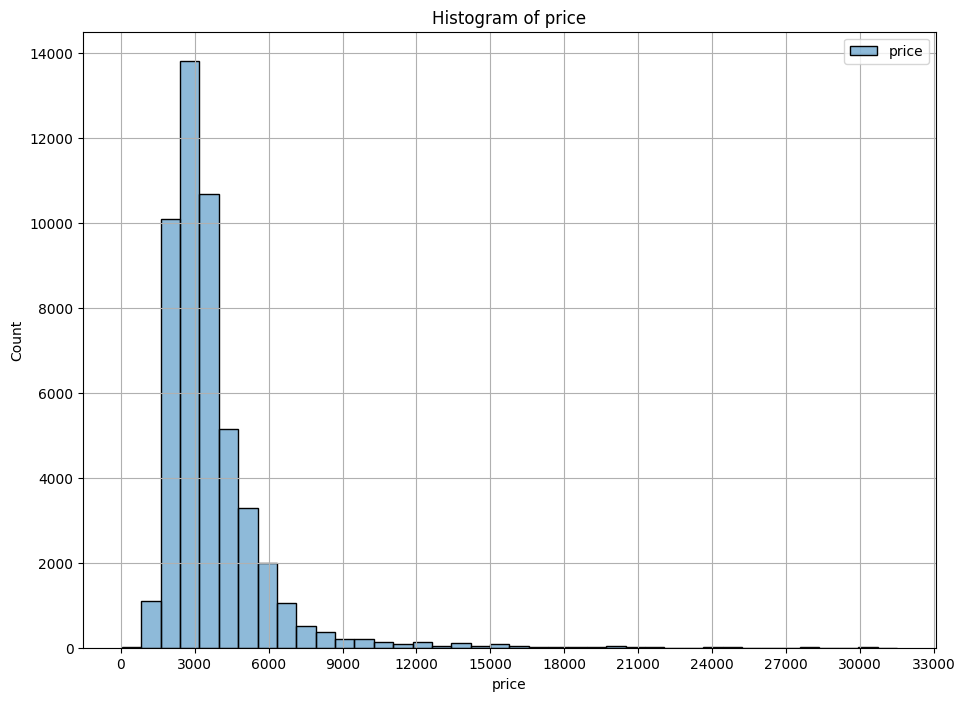

In [9]:
plt.figure(figsize=(11, 8))
sns.histplot(df[target][df[target] < 35000], bins=40)
plt.title('Histogram of price')
plt.xlabel('price')
plt.xticks(np.arange(0, 35000, 3000))
plt.grid(True)
plt.show()

По гистограмме можно сказать что большинсвто цен примерно в диапазоне от 2к до 4к.
Также присутствуют выбросы(очень высокие и очень низкие цены)

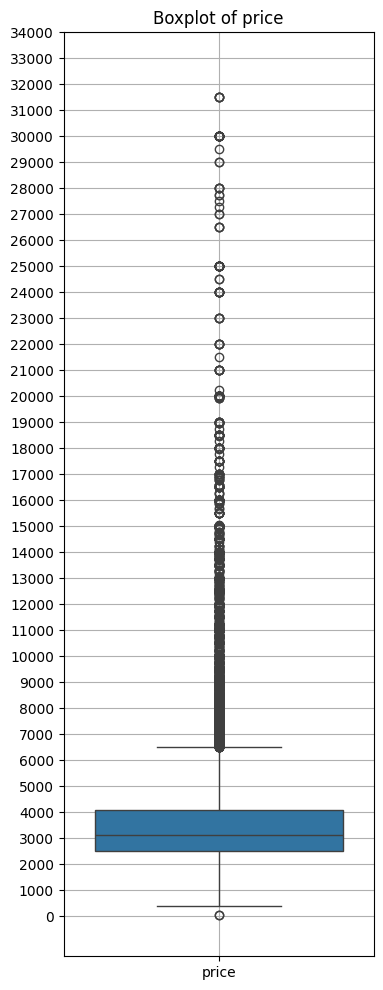

In [10]:
plt.figure(figsize=(4, 12))
sns.boxplot(df[target][df[target] < 35000])
plt.title('Boxplot of price')
plt.yticks(np.arange(0, 35000, 1000))
plt.grid(True)
plt.show()

### Delete values < 0.01 percentiles and > 0.99 percentiles

In [11]:
low_bound = df[target][df[target] < df[target].quantile(0.01)].dropna()
high_bound = df[target][df[target] > df[target].quantile(0.99)].dropna()
outliers = pd.concat([low_bound, high_bound])
index_remove = outliers.index.tolist()

In [12]:
df = df.drop(index_remove)
df

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795
...,...,...,...,...
124000,1.0,3,low,2800
124002,1.0,2,medium,2395
124004,1.0,1,medium,1850
124008,1.0,2,medium,4195


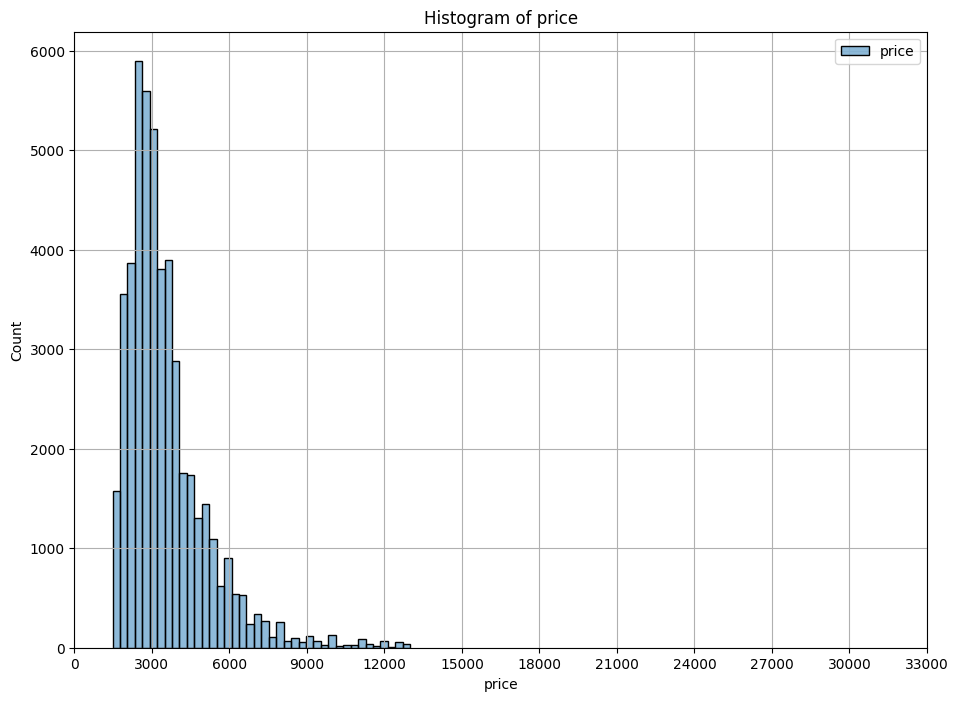

In [13]:
plt.figure(figsize=(11, 8))
sns.histplot(df[target][df[target] < 35000], bins=40)
plt.title('Histogram of price')
plt.xlabel('price')
plt.xticks(np.arange(0, 35000, 3000))
plt.grid(True)
plt.show()

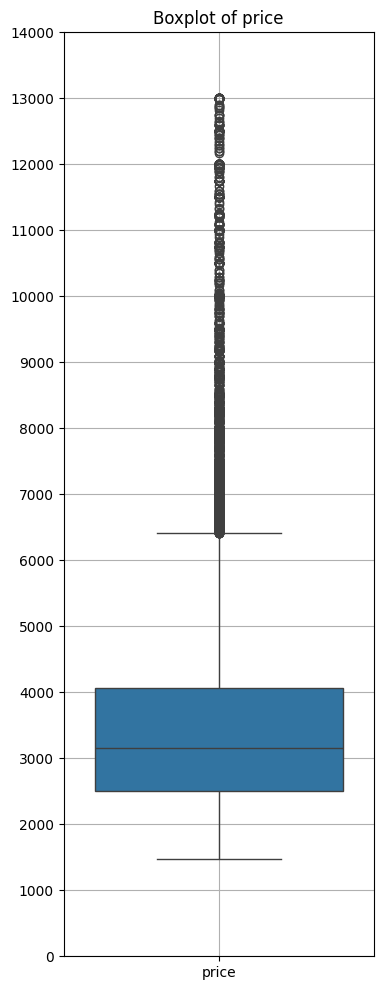

In [14]:
plt.figure(figsize=(4, 12))
sns.boxplot(df[target][df[target] < 15000])
plt.title('Boxplot of price')
plt.yticks(np.arange(0, 15000, 1000))
plt.grid(True)
plt.show()

Мы удалили выбросы, график стали более устойчивы

## Characteristics Analysis

In [15]:
df['interest_level'].info()

<class 'pandas.core.series.Series'>
Index: 48379 entries, 4 to 124009
Series name: interest_level
Non-Null Count  Dtype 
--------------  ----- 
48379 non-null  object
dtypes: object(1)
memory usage: 755.9+ KB


In [16]:
df['interest_level'].value_counts()

interest_level
low       33697
medium    11116
high       3566
Name: count, dtype: int64

In [17]:
encoder = LabelEncoder()
df['interest_level'] = encoder.fit_transform(df['interest_level'])
df

,bathrooms,bedrooms,interest_level,price
4,1.0,1,2,2400
6,1.0,2,1,3800
9,1.0,2,2,3495
10,1.5,3,2,3000
15,1.0,0,1,2795
...,...,...,...,...
124000,1.0,3,1,2800
124002,1.0,2,2,2395
124004,1.0,1,2,1850
124008,1.0,2,2,4195


## Histogram of bedrooms and bathrooms

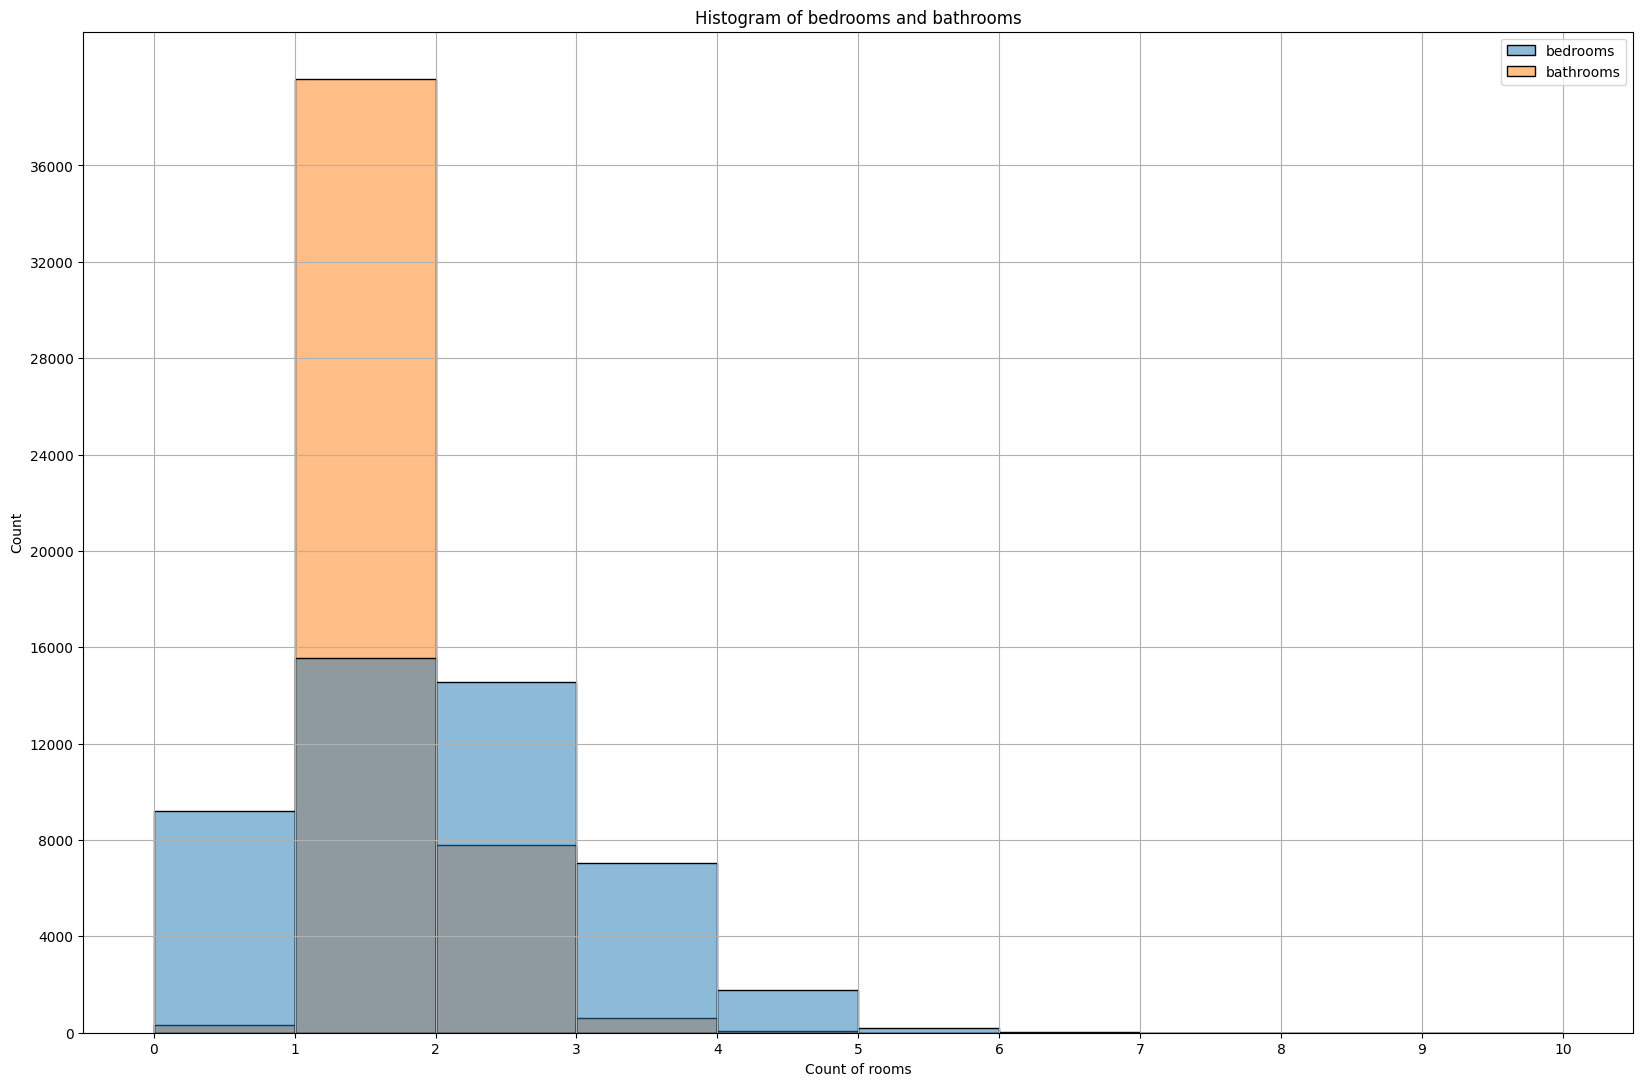

In [18]:
plt.figure(figsize=(20,13))
sns.histplot(df[['bedrooms', 'bathrooms']], bins=10)
plt.title('Histogram of bedrooms and bathrooms')
plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(0, 40000, 4000))
plt.xlabel('Count of rooms')
plt.grid(True)
plt.show()

По гистограмме видно что есть выбросы прроверим

In [19]:
df['bathrooms'].value_counts()

bathrooms
1.0     38928
2.0      7580
1.5       645
3.0       572
0.0       302
2.5       232
4.0        84
3.5        33
10.0        1
5.0         1
4.5         1
Name: count, dtype: int64

In [20]:
df['bedrooms'].value_counts()

bedrooms
1    15540
2    14546
0     9201
3     7061
4     1778
5      206
6       44
8        2
7        1
Name: count, dtype: int64

видим что есть строка где есть 10 ванных комнат, да и комнат мало для такого колва ванных, еще и стоит дешево. Считаем это выбросом.

In [21]:
df[df['bathrooms'] == 10.0]

,bathrooms,bedrooms,interest_level,price
104459,10.0,2,1,3600


In [28]:
df = df.drop([104459])

# III Complex analysis

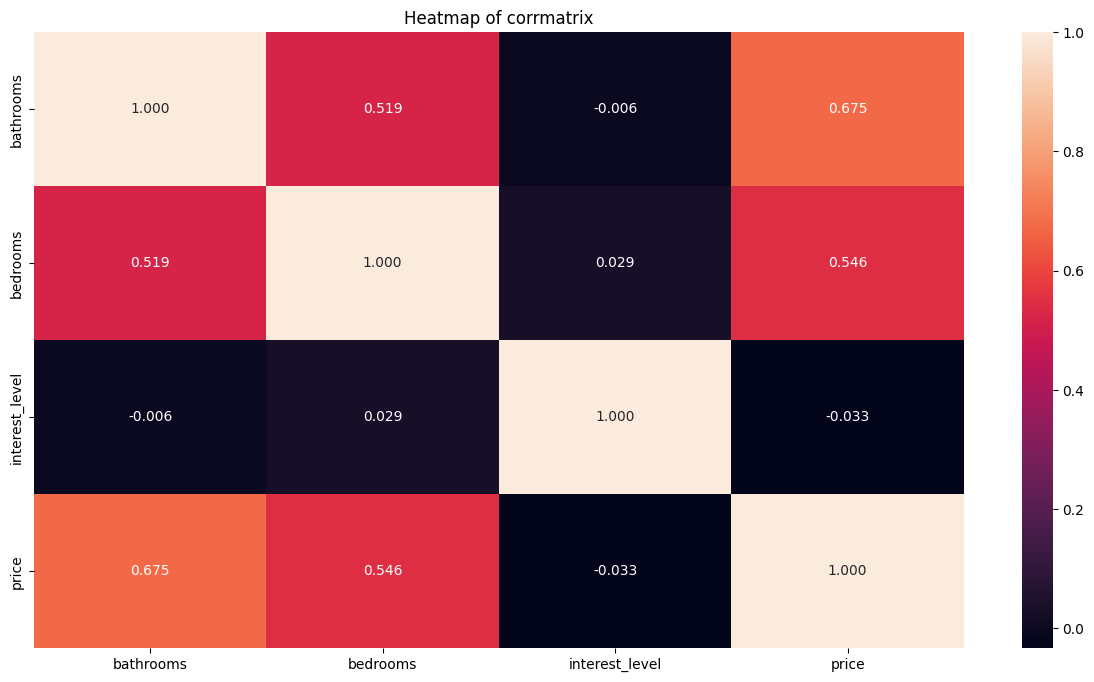

In [29]:
corrmatrix = df.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corrmatrix, annot=True, fmt='.3f')
plt.title('Heatmap of corrmatrix')
plt.show()

сильная корреляция с bathrooms и bedrooms

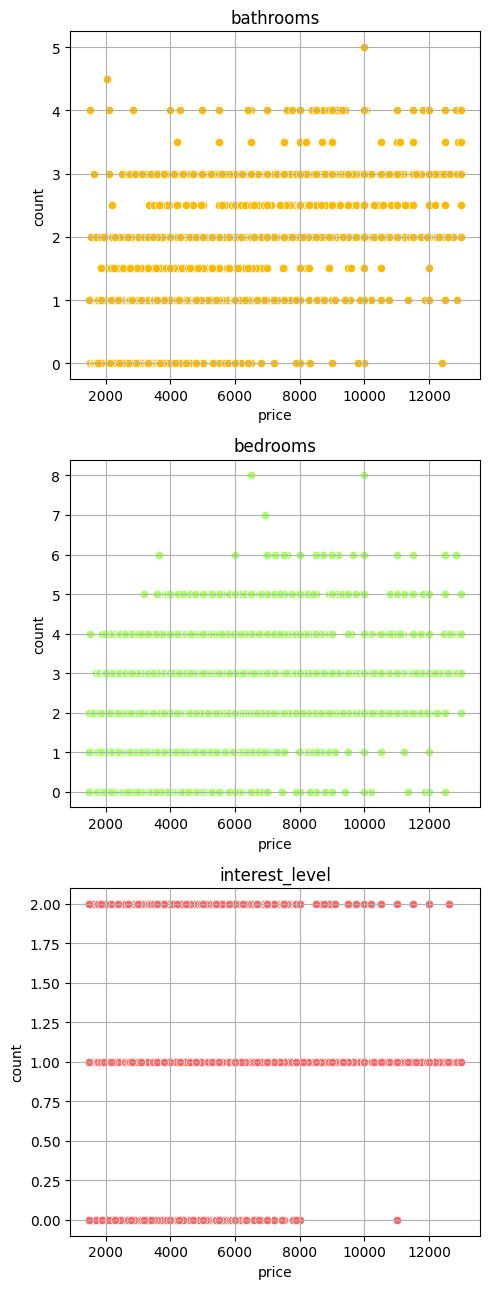

In [30]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(5, 13))

sns.scatterplot(data=df, x='price', y='bathrooms', ax=axs[0], marker='o', color='#fcba03')
axs[0].set_title('bathrooms')
axs[0].set_ylabel('count')
axs[0].grid(True)

sns.scatterplot(data=df, x='price', y='bedrooms', ax=axs[1], marker='o', color='#a7ff63')
axs[1].set_title('bedrooms')
axs[1].set_ylabel('count')
axs[1].grid(True)

sns.scatterplot(data=df, x='price', y='interest_level', ax=axs[2], marker='o', color='#ff6363')
axs[2].set_title('interest_level')
axs[2].set_ylabel('count')
axs[2].grid(True)

plt.xlabel('price')
plt.tight_layout() 
plt.show()

# IV Creating Features

In [35]:
def squared(x):
    return x ** 2

new_df = df.copy()
new_df['squared_batrooms'] = new_df['bathrooms'].apply(squared)
new_df['squared_bedrooms'] = new_df['bedrooms'].apply(squared)
new_df['squared_interest_level'] = new_df['interest_level'].apply(squared)
new_df

,bathrooms,bedrooms,interest_level,price,squared_batrooms,squared_bedrooms,squared_interest_level
4,1.0,1,2,2400,1.00,1,4
6,1.0,2,1,3800,1.00,4,1
9,1.0,2,2,3495,1.00,4,4
10,1.5,3,2,3000,2.25,9,4
15,1.0,0,1,2795,1.00,0,1
...,...,...,...,...,...,...,...
124000,1.0,3,1,2800,1.00,9,1
124002,1.0,2,2,2395,1.00,4,4
124004,1.0,1,2,1850,1.00,1,4
124008,1.0,2,2,4195,1.00,4,4


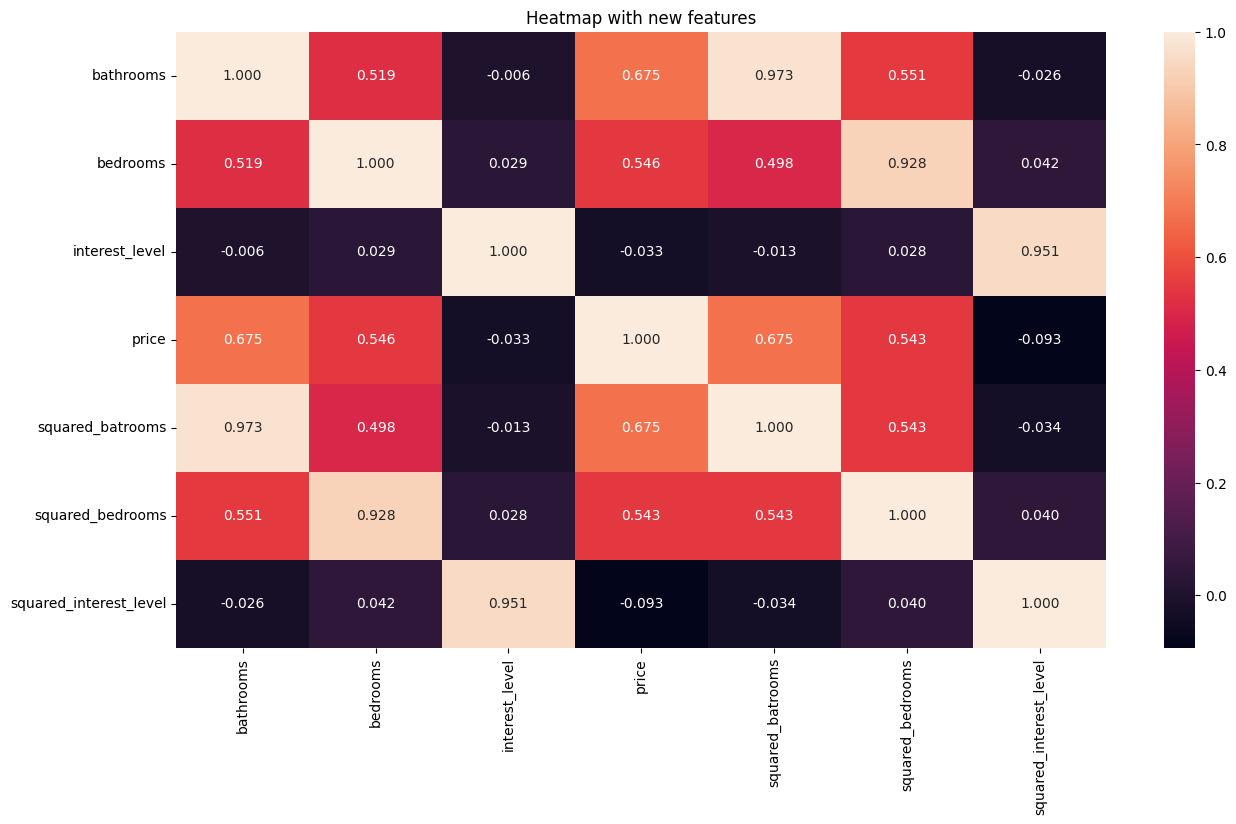

In [39]:
corr_matrix = new_df.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True,fmt='.3f')
plt.title('Heatmap with new features')
plt.show()

новые приззнаки имеют более плохую корреляцию

## PolinomialFeatures

In [41]:
poly = PolynomialFeatures(degree=10)

In [47]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, shuffle=True)

In [52]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [53]:
df_poly = pd.DataFrame(
    X_train_poly,
    columns=poly.get_feature_names_out()  # Автоматические названия колонок
)

df_poly

,1,bathrooms,bedrooms,interest_level,bathrooms^2,bathrooms bedrooms,bathrooms interest_level,bedrooms^2,bedrooms interest_level,interest_level^2,...,bedrooms^9 interest_level,bedrooms^8 interest_level^2,bedrooms^7 interest_level^3,bedrooms^6 interest_level^4,bedrooms^5 interest_level^5,bedrooms^4 interest_level^6,bedrooms^3 interest_level^7,bedrooms^2 interest_level^8,bedrooms interest_level^9,interest_level^10
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,2.0,2.0,1.0,2.0,2.0,4.0,4.0,4.0,...,1024.0,1024.0,1024.0,1024.0,1024.0,1024.0,1024.0,1024.0,1024.0,1024.0
2,1.0,2.0,2.0,1.0,4.0,4.0,2.0,4.0,2.0,1.0,...,512.0,256.0,128.0,64.0,32.0,16.0,8.0,4.0,2.0,1.0
3,1.0,1.0,2.0,1.0,1.0,2.0,1.0,4.0,2.0,1.0,...,512.0,256.0,128.0,64.0,32.0,16.0,8.0,4.0,2.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38697,1.0,2.0,3.0,1.0,4.0,6.0,2.0,9.0,3.0,1.0,...,19683.0,6561.0,2187.0,729.0,243.0,81.0,27.0,9.0,3.0,1.0
38698,1.0,1.0,2.0,1.0,1.0,2.0,1.0,4.0,2.0,1.0,...,512.0,256.0,128.0,64.0,32.0,16.0,8.0,4.0,2.0,1.0
38699,1.0,2.0,3.0,1.0,4.0,6.0,2.0,9.0,3.0,1.0,...,19683.0,6561.0,2187.0,729.0,243.0,81.0,27.0,9.0,3.0,1.0
38700,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,4.0,...,2.0,4.0,8.0,16.0,32.0,64.0,128.0,256.0,512.0,1024.0


# V Train models

## result dataframes

In [111]:
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])

## Linear Regression

In [59]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_poly, y_train)

LinearRegression()

In [112]:
y_train_pred = linear_reg.predict(X_train_poly)
y_test_pred = linear_reg.predict(X_test_poly)

train_mae = mean_absolute_error(y_train_pred, y_train)
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))

test_mae = mean_absolute_error(y_test_pred, y_test)
test_rmse = np.sqrt(mean_squared_error(y_test_pred, y_test))

row_mae = {'model': 'linear_regression', 'train': train_mae, 'test': test_mae}
row_rmse = {'model': 'linear_regression', 'train': float(train_rmse), 'test': float(test_rmse)}

In [113]:
result_MAE.loc[len(result_MAE)] = row_mae
result_RMSE.loc[len(result_RMSE)] = row_rmse

## Decision Tree

In [75]:
tree = DecisionTreeRegressor(random_state=21)
tree.fit(X_train_poly, y_train)

DecisionTreeRegressor(random_state=21)

In [114]:
y_train_pred = tree.predict(X_train_poly)
y_test_pred = tree.predict(X_test_poly)

train_mae = mean_absolute_error(y_train_pred, y_train)
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))

test_mae = mean_absolute_error(y_test_pred, y_test)
test_rmse = np.sqrt(mean_squared_error(y_test_pred, y_test))

row_mae = {'model': 'decision_tree', 'train': train_mae, 'test': test_mae}
row_rmse = {'model': 'decision_tree', 'train': float(train_rmse), 'test': float(test_rmse)}

In [115]:
result_MAE.loc[len(result_MAE)] = row_mae
result_RMSE.loc[len(result_RMSE)] = row_rmse

## Naive regressors

In [116]:
train_mean = y_train.mean().iloc[0]
test_mean = y_test.mean().iloc[0]

train_median = y_train.median().iloc[0]
test_median = y_test.median().iloc[0]

In [90]:
print(y_train.shape, y_test.shape)

(38702, 1) (9676, 1)


In [117]:
train_naive_mean = pd.Series([train_mean] * 38702)
train_naive_median= pd.Series([train_median] * 38702)

test_naive_mean = pd.Series([test_mean] * 9676)
test_naive_median = pd.Series([test_median] * 9676)

### mean

In [118]:
train_mae = mean_absolute_error(train_naive_mean, y_train)
train_rmse = np.sqrt(mean_squared_error(train_naive_mean, y_train))

test_mae = mean_absolute_error(test_naive_mean, y_test)
test_rmse = np.sqrt(mean_squared_error(test_naive_mean, y_test))

row_mae = {'model': 'naive_mean', 'train': train_mae, 'test': test_mae}
row_rmse = {'model': 'naive_mean', 'train': float(train_rmse), 'test': float(test_rmse)}

In [119]:
result_MAE.loc[len(result_MAE)] = row_mae
result_RMSE.loc[len(result_RMSE)] = row_rmse

### median

In [120]:
train_mae = mean_absolute_error(train_naive_median, y_train)
train_rmse = np.sqrt(mean_squared_error(train_naive_median, y_train))

test_mae = mean_absolute_error(test_naive_median, y_test)
test_rmse = np.sqrt(mean_squared_error(test_naive_median, y_test))

row_mae = {'model': 'naive_median', 'train': train_mae, 'test': test_mae}
row_rmse = {'model': 'naive_median', 'train': float(train_rmse), 'test': float(test_rmse)}

In [121]:
result_MAE.loc[len(result_MAE)] = row_mae
result_RMSE.loc[len(result_RMSE)] = row_rmse

In [122]:
result_MAE

,model,train,test
0,linear_regression,721.237882,883.839709
1,decision_tree,721.237882,726.789372
2,naive_mean,1138.705746,1141.241178
3,naive_median,1086.061857,1086.870814


In [123]:
result_RMSE

,model,train,test
0,linear_regression,1032.037764,12894.666043
1,decision_tree,1032.037764,1038.531516
2,naive_mean,1598.899904,1592.706145
3,naive_median,1645.527288,1639.141991


# Лучшая модель - Decision Tree